In [1]:
import sys
import datetime
import pandas as pd

path_root = '../../..'
sys.path.append(f'{path_root}/')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = 'sardegna'

path_data = f'{path_root}/data'
path_img_root =  f'{path_data}/imgs/grafici/{level}/{region_name}'
path_csv = f'{path_data}/csv'
csv_in_name = f'{path_csv}/{level}/covid19-{region_name}.csv'

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,20,Sardegna,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,20,Sardegna,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,20,Sardegna,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,20,Sardegna,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
4,2020-02-29T17:00:00,20,Sardegna,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2021-03-21T17:00:00,20,Sardegna,178,21,199,12817,13016,118,176,...,4.0,16280.0,2308.0,116.0,10.55,1.53,1.08,7.63,-4.55,0.91
391,2021-03-22T17:00:00,20,Sardegna,185,22,207,12877,13084,68,161,...,5.0,14175.0,1331.0,60.0,10.63,1.58,1.14,12.10,4.76,0.52
392,2021-03-23T17:00:00,20,Sardegna,172,24,196,12971,13167,83,159,...,2.0,8510.0,2108.0,94.0,12.24,1.49,1.87,7.54,9.09,0.63
393,2021-03-24T17:00:00,20,Sardegna,173,26,199,13030,13229,62,153,...,2.0,4558.0,2493.0,59.0,13.07,1.50,3.36,6.14,8.33,0.47


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 3, 25, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 211
Nuovi tamponi: 3546.0
Percentuale nuovi positivi/nuovi tamponi: 6.0 %
Nuovi guariti: 79.0
Nuovi deceduti: 1.0
Variazione positivi ricoverati con sintomi: 0.0
Variazione positivi in terapia intensiva: 1.0
Variazione positivi in isolamento dimiciliare: 130.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 3, 25, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-01-24T17:00:00,20,Sardegna,464,45,509,16589,17098,75,175,...,3.0,2674.0,2233.0,69.0,8.84,2.98,6.54,7.84,-2.17,0.44
1,2021-01-25T17:00:00,20,Sardegna,472,48,520,16483,17003,-95,207,...,3.0,3240.0,1770.0,-106.0,9.23,3.06,6.39,11.69,6.67,-0.56
2,2021-01-26T17:00:00,20,Sardegna,468,44,512,16286,16798,-205,138,...,3.0,4343.0,2713.0,-197.0,8.59,3.05,3.18,5.09,-8.33,-1.21
3,2021-01-27T17:00:00,20,Sardegna,471,43,514,16034,16548,-250,251,...,7.0,4403.0,3102.0,-252.0,8.37,3.11,5.70,8.09,-2.27,-1.49
4,2021-01-28T17:00:00,20,Sardegna,465,43,508,15845,16353,-195,237,...,7.0,4490.0,2717.0,-189.0,8.46,3.11,5.28,8.72,0.00,-1.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-03-21T17:00:00,20,Sardegna,178,21,199,12817,13016,118,176,...,4.0,16280.0,2308.0,116.0,10.55,1.53,1.08,7.63,-4.55,0.91
57,2021-03-22T17:00:00,20,Sardegna,185,22,207,12877,13084,68,161,...,5.0,14175.0,1331.0,60.0,10.63,1.58,1.14,12.10,4.76,0.52
58,2021-03-23T17:00:00,20,Sardegna,172,24,196,12971,13167,83,159,...,2.0,8510.0,2108.0,94.0,12.24,1.49,1.87,7.54,9.09,0.63
59,2021-03-24T17:00:00,20,Sardegna,173,26,199,13030,13229,62,153,...,2.0,4558.0,2493.0,59.0,13.07,1.50,3.36,6.14,8.33,0.47


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

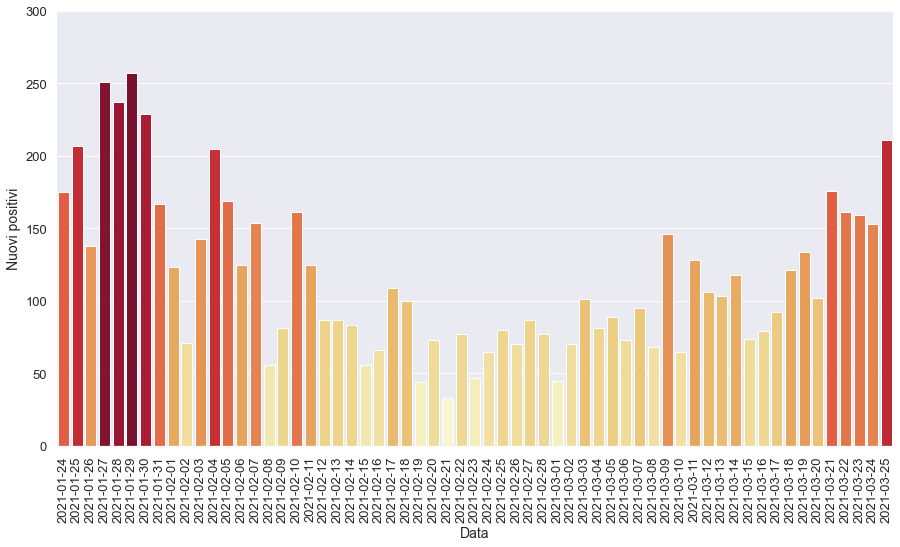

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

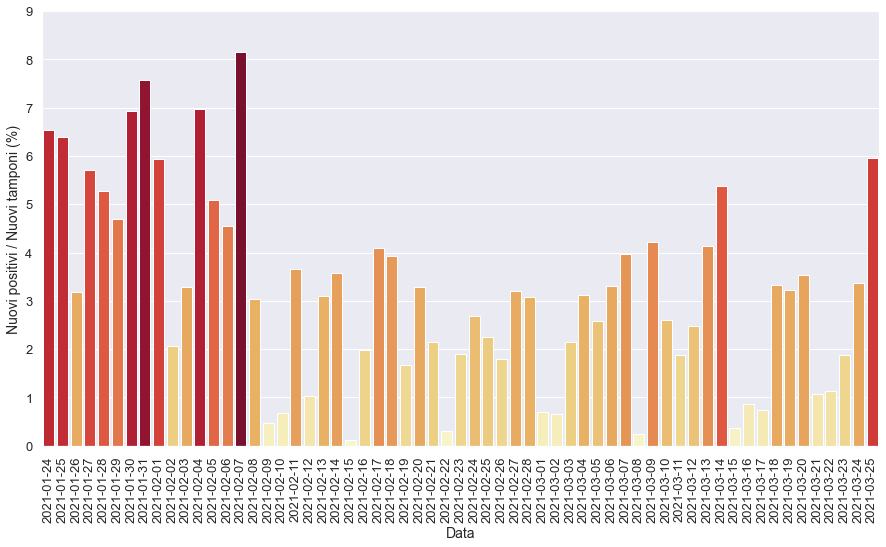

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

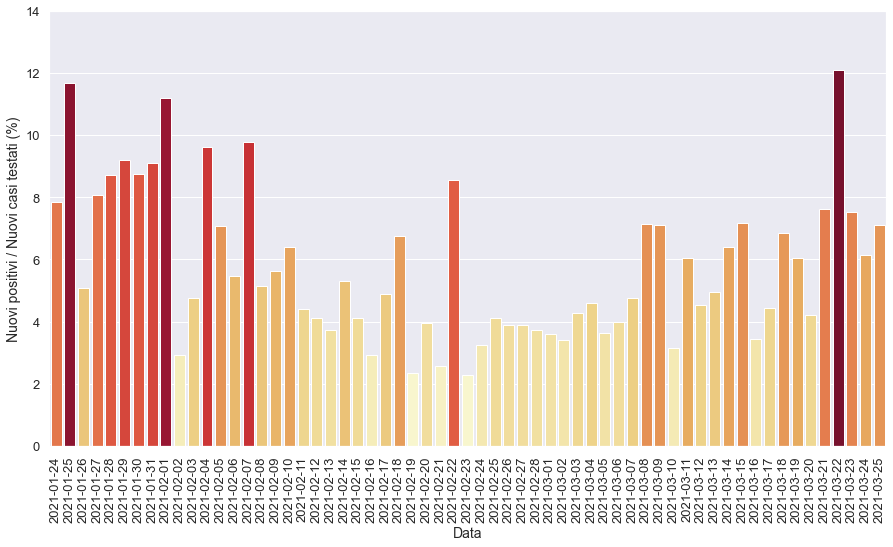

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

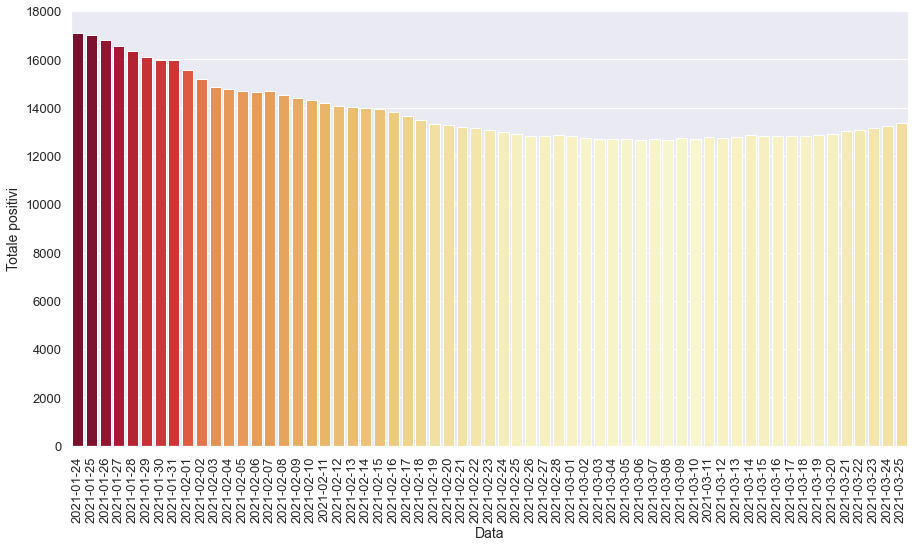

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

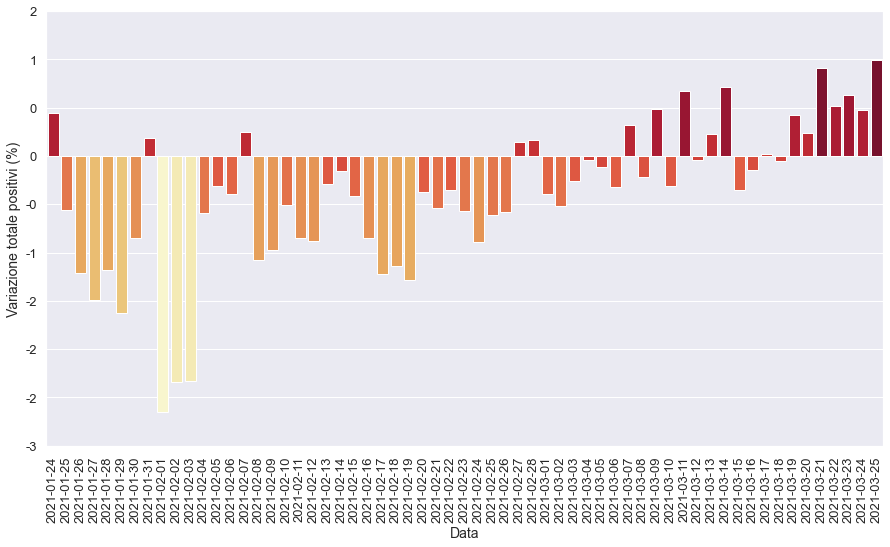

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

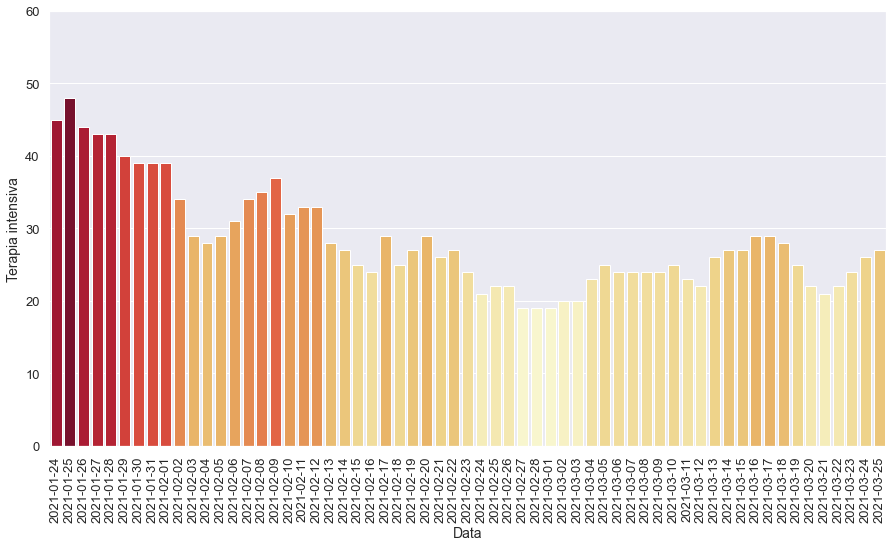

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

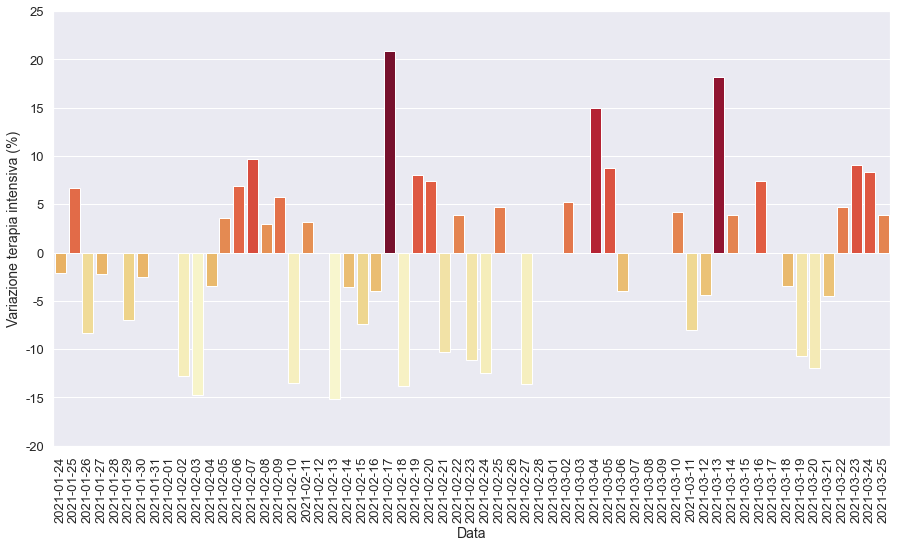

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

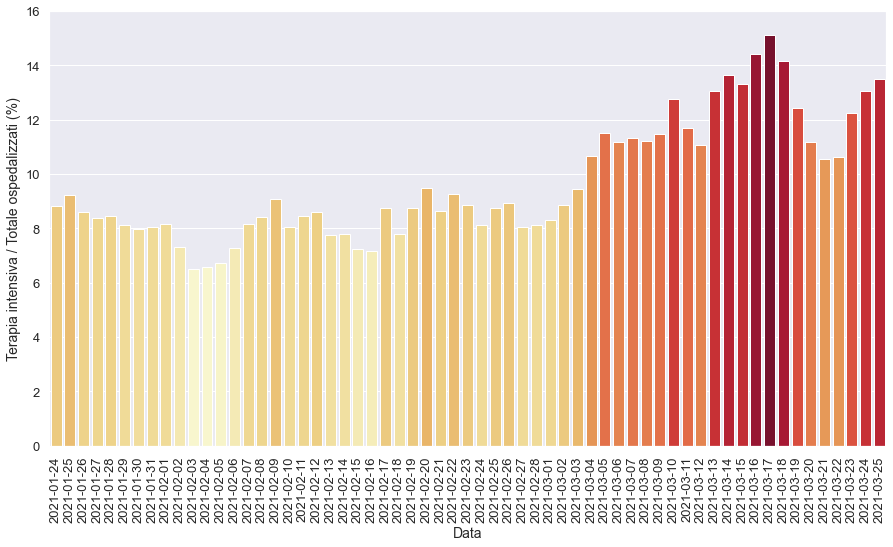

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

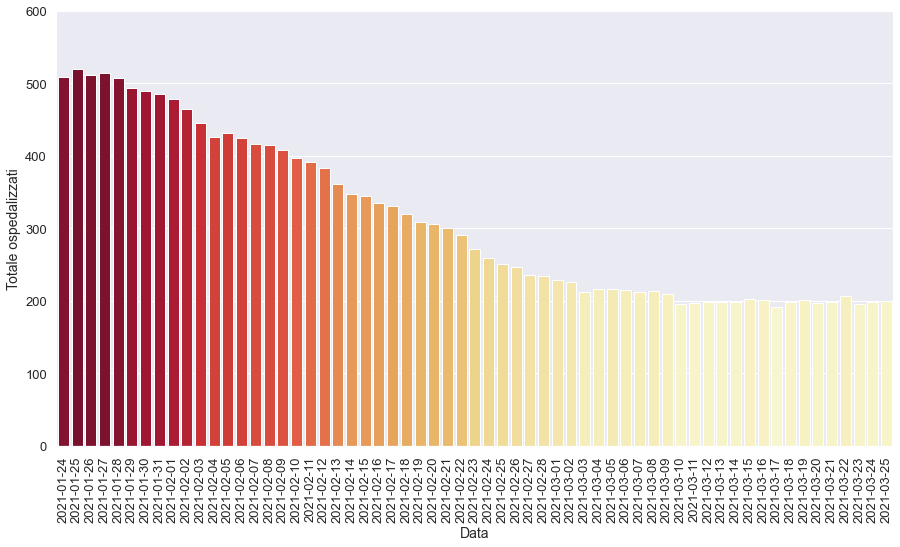

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

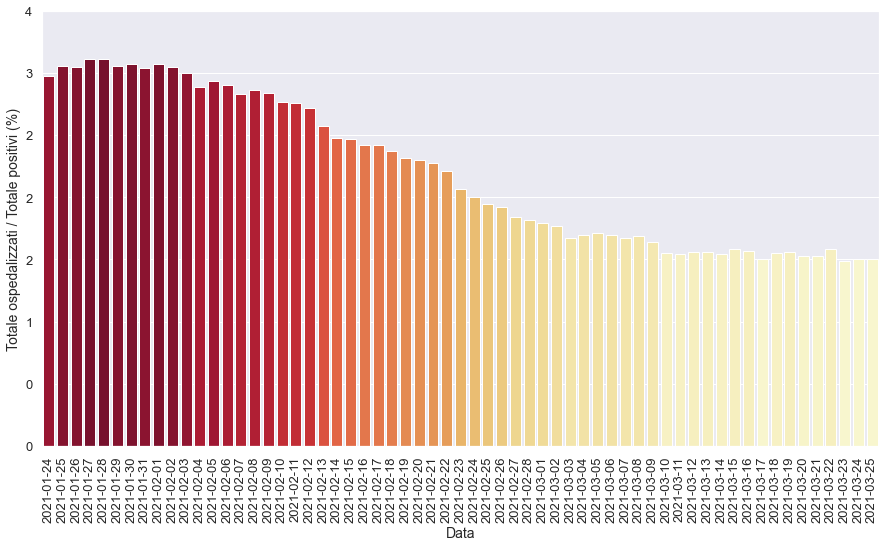

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

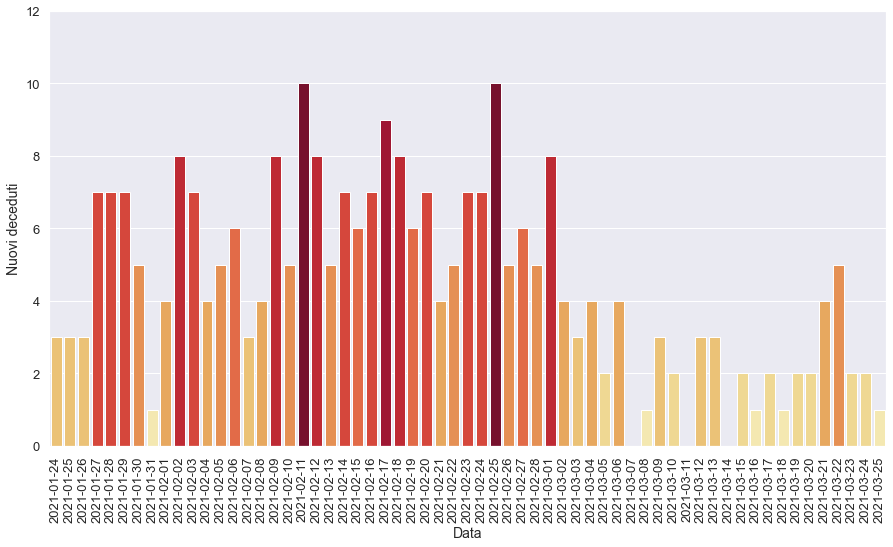

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

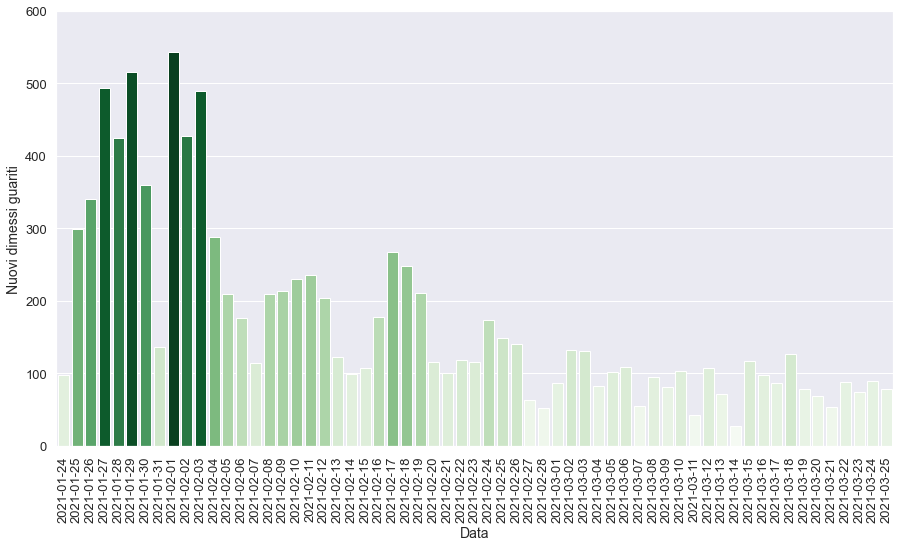

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-02-23T17:00:00,20,Sardegna,247,24,271,12816,13087,-75,47,...,7.0,2458.0,2062.0,-55.0,8.86,2.07,1.91,2.28,-11.11,-0.57
1,2021-02-24T17:00:00,20,Sardegna,238,21,259,12712,12971,-116,65,...,7.0,2418.0,2015.0,-104.0,8.11,2.00,2.69,3.23,-12.50,-0.89
2,2021-02-25T17:00:00,20,Sardegna,229,22,251,12641,12892,-79,80,...,10.0,3556.0,1936.0,-71.0,8.76,1.95,2.25,4.13,4.76,-0.61
3,2021-02-26T17:00:00,20,Sardegna,224,22,246,12571,12817,-75,70,...,5.0,3890.0,1795.0,-70.0,8.94,1.92,1.80,3.90,0.00,-0.58
4,2021-02-27T17:00:00,20,Sardegna,217,19,236,12599,12835,18,87,...,6.0,2721.0,2243.0,28.0,8.05,1.84,3.20,3.88,-13.64,0.14
5,2021-02-28T17:00:00,20,Sardegna,215,19,234,12621,12855,20,77,...,5.0,2510.0,2067.0,22.0,8.12,1.82,3.07,3.73,0.00,0.16
6,2021-03-01T17:00:00,20,Sardegna,210,19,229,12576,12805,-50,45,...,8.0,6514.0,1249.0,-45.0,8.30,1.79,0.69,3.60,0.00,-0.39
7,2021-03-02T17:00:00,20,Sardegna,206,20,226,12513,12739,-66,70,...,4.0,10613.0,2059.0,-63.0,8.85,1.77,0.66,3.40,5.26,-0.52
8,2021-03-03T17:00:00,20,Sardegna,192,20,212,12494,12706,-33,101,...,3.0,4717.0,2369.0,-19.0,9.43,1.67,2.14,4.26,0.00,-0.26
9,2021-03-04T17:00:00,20,Sardegna,193,23,216,12485,12701,-5,81,...,4.0,2600.0,1756.0,-9.0,10.65,1.70,3.12,4.61,15.00,-0.04


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

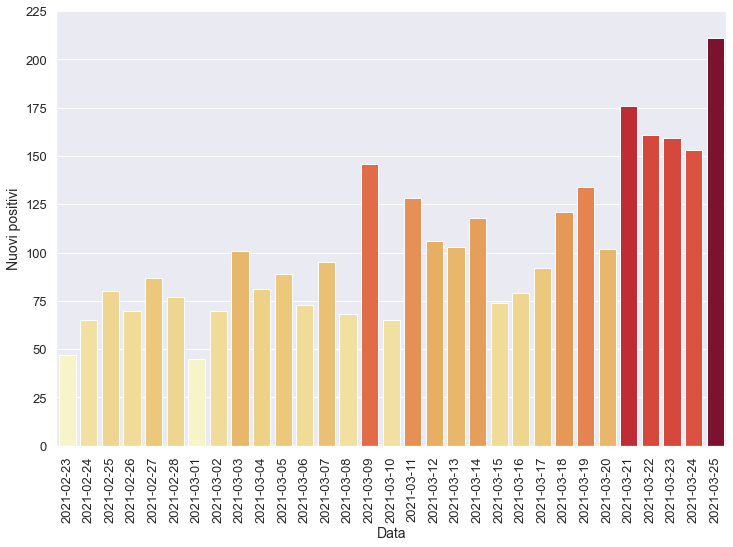

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

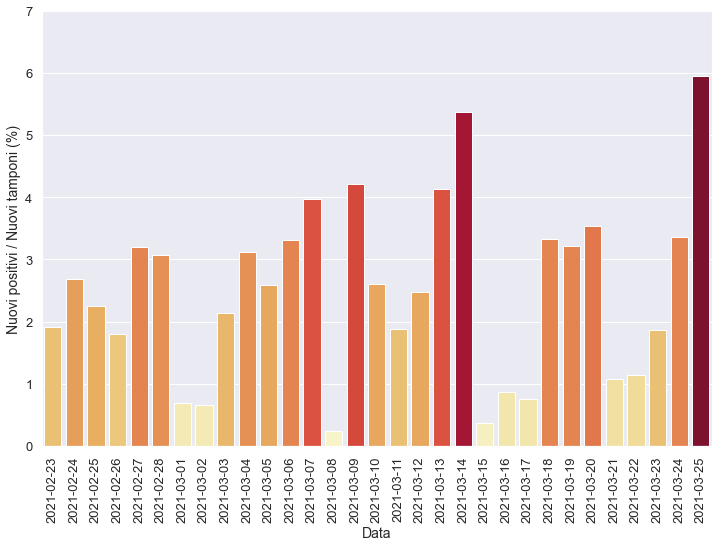

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

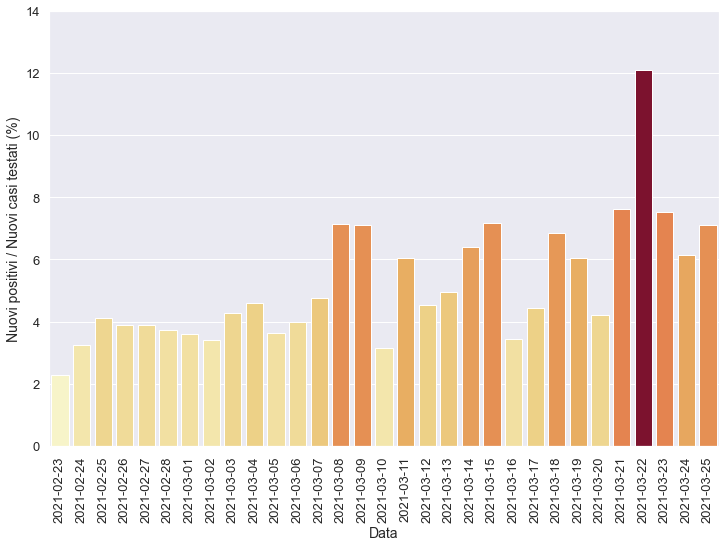

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

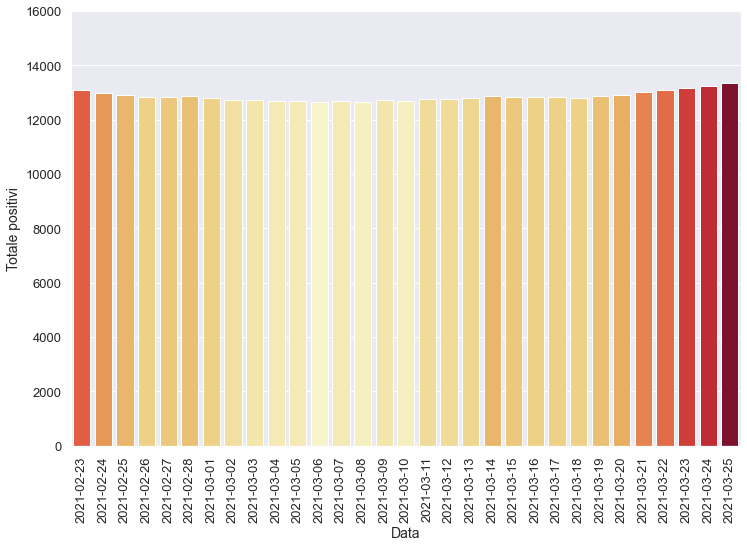

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

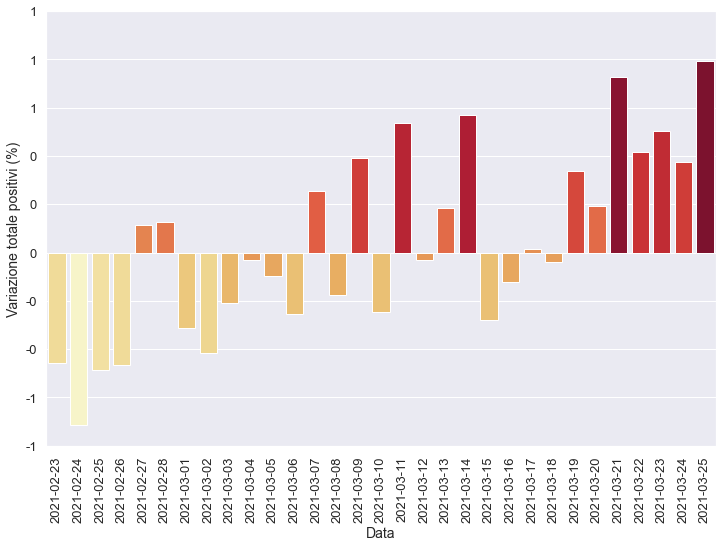

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

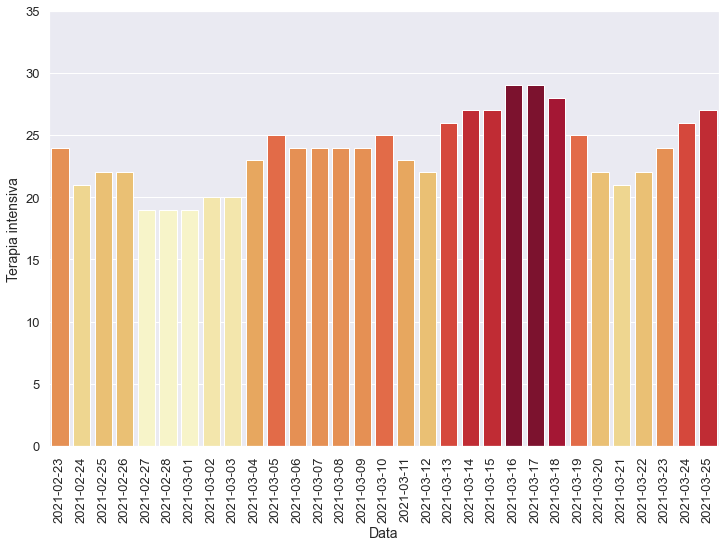

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

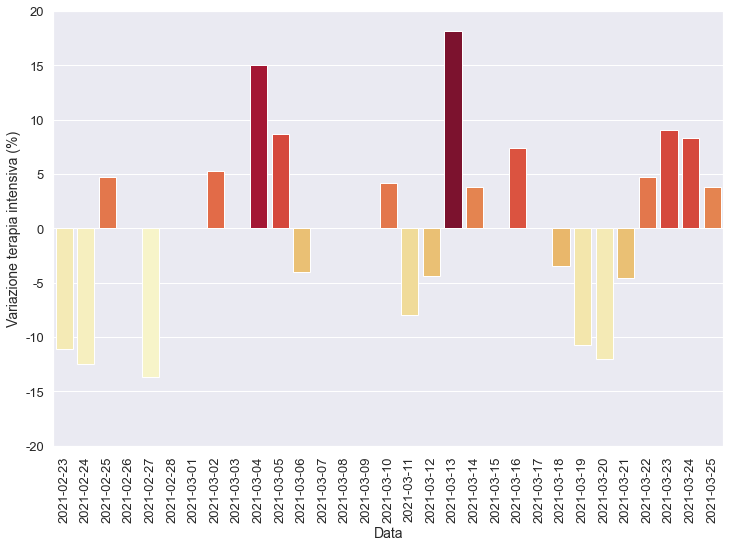

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

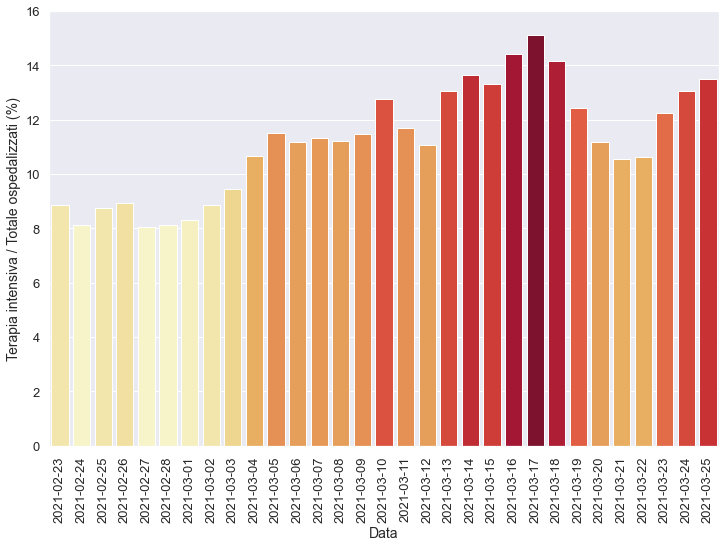

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

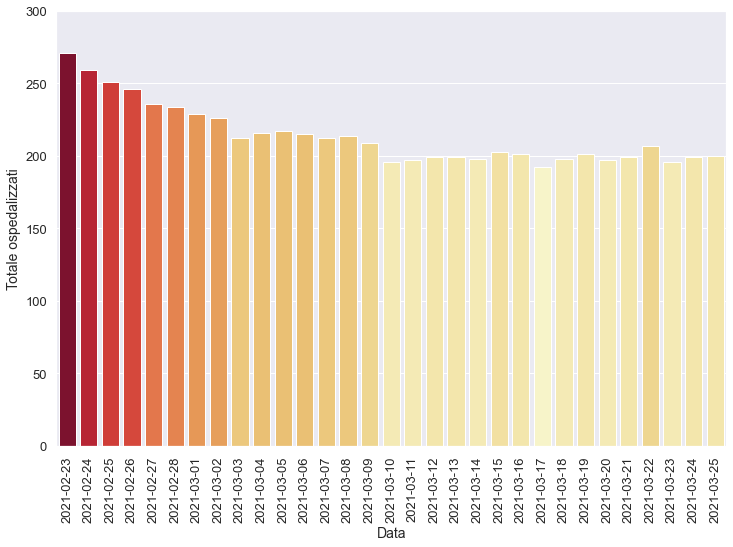

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

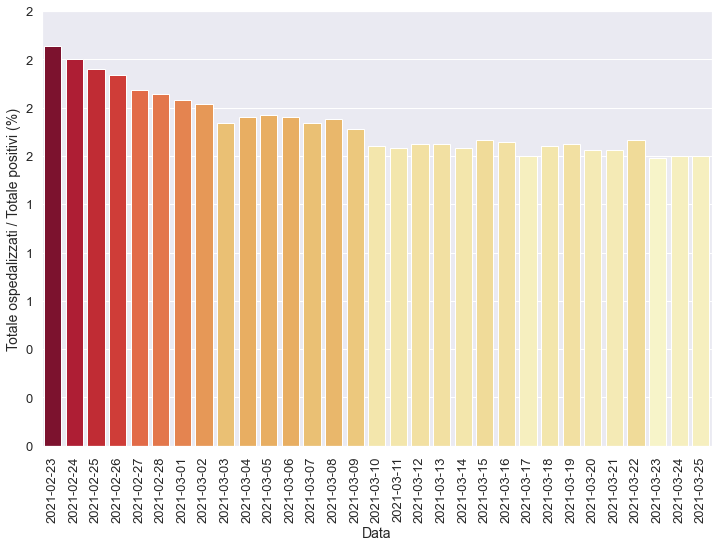

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

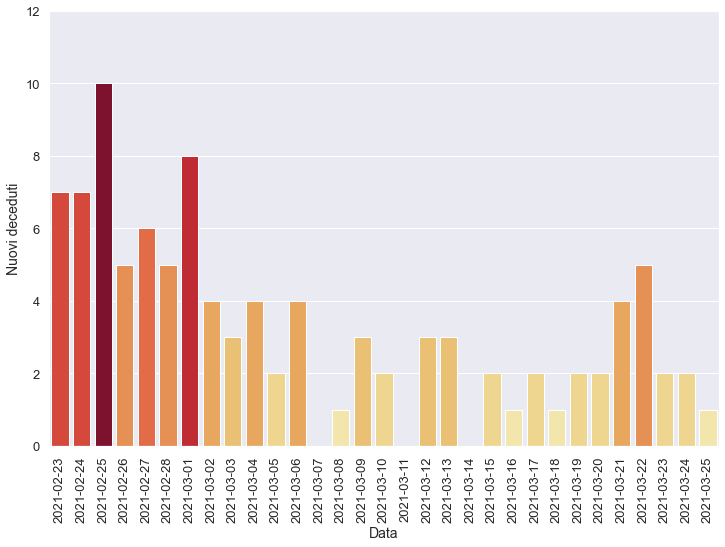

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

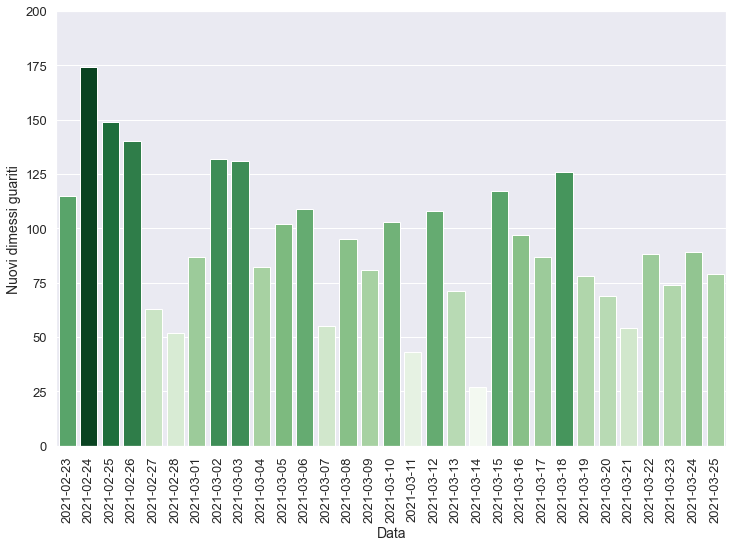

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-03-18T17:00:00,20,Sardegna,170,28,198,12615,12813,-6,121,...,1.0,3631.0,1764.0,-12.0,14.14,1.55,3.33,6.86,-3.45,-0.05
1,2021-03-19T17:00:00,20,Sardegna,176,25,201,12666,12867,54,134,...,2.0,4166.0,2223.0,51.0,12.44,1.56,3.22,6.03,-10.71,0.42
2,2021-03-20T17:00:00,20,Sardegna,175,22,197,12701,12898,31,102,...,2.0,2889.0,2425.0,35.0,11.17,1.53,3.53,4.21,-12.00,0.24
3,2021-03-21T17:00:00,20,Sardegna,178,21,199,12817,13016,118,176,...,4.0,16280.0,2308.0,116.0,10.55,1.53,1.08,7.63,-4.55,0.91
4,2021-03-22T17:00:00,20,Sardegna,185,22,207,12877,13084,68,161,...,5.0,14175.0,1331.0,60.0,10.63,1.58,1.14,12.10,4.76,0.52
5,2021-03-23T17:00:00,20,Sardegna,172,24,196,12971,13167,83,159,...,2.0,8510.0,2108.0,94.0,12.24,1.49,1.87,7.54,9.09,0.63
6,2021-03-24T17:00:00,20,Sardegna,173,26,199,13030,13229,62,153,...,2.0,4558.0,2493.0,59.0,13.07,1.50,3.36,6.14,8.33,0.47
7,2021-03-25T17:00:00,20,Sardegna,173,27,200,13160,13360,131,211,...,1.0,3546.0,2970.0,130.0,13.50,1.50,5.95,7.10,3.85,0.99


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

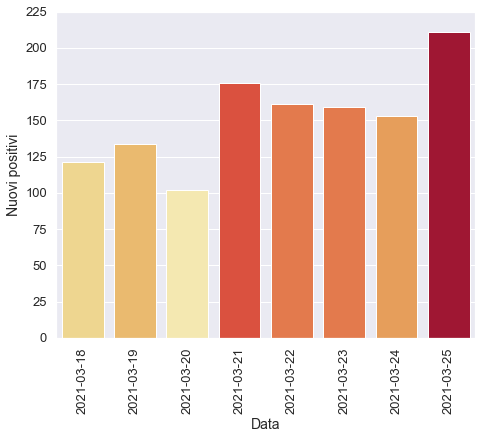

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

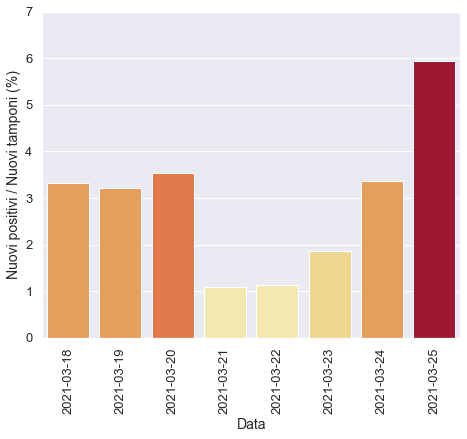

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

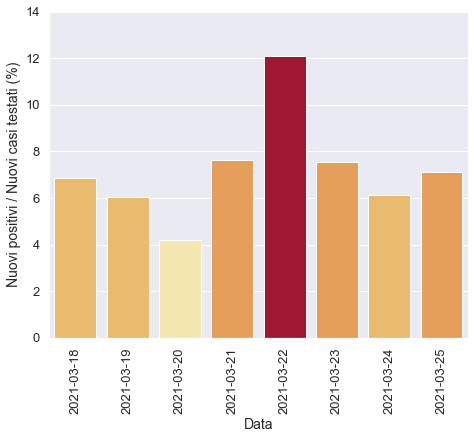

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

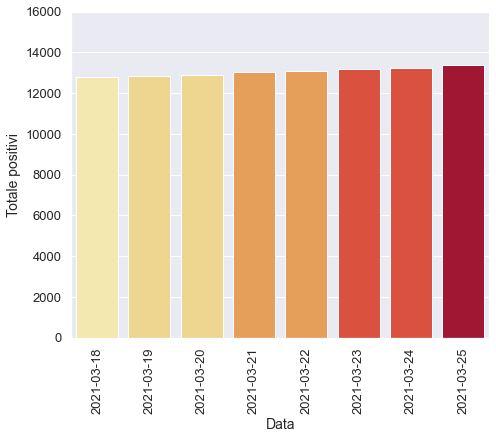

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

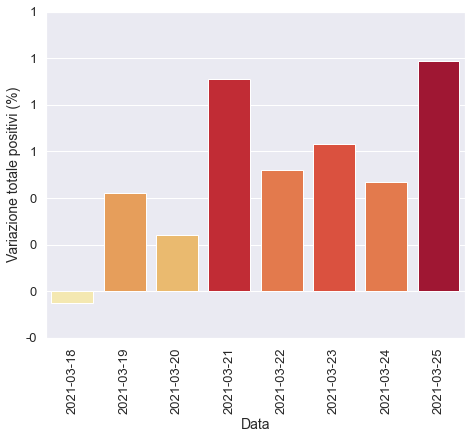

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

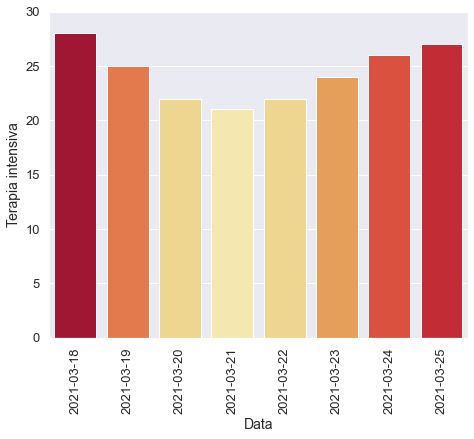

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

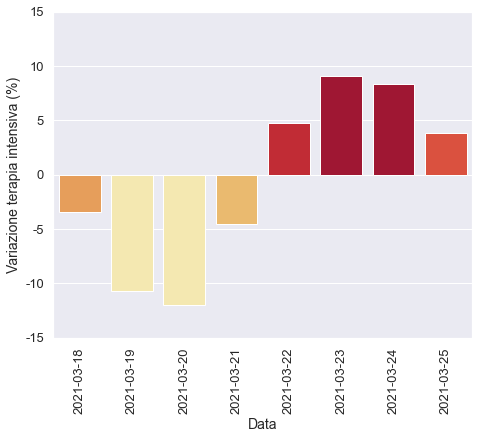

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

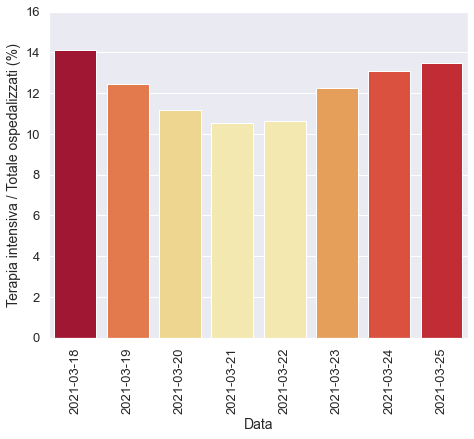

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

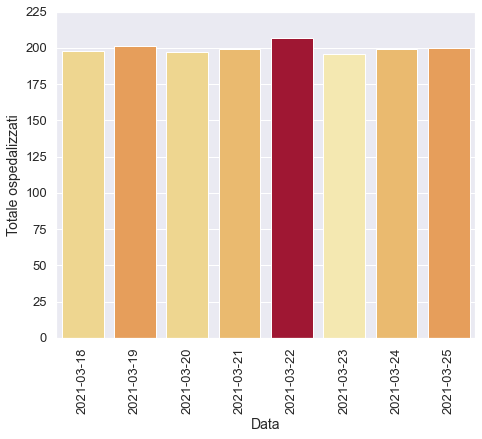

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

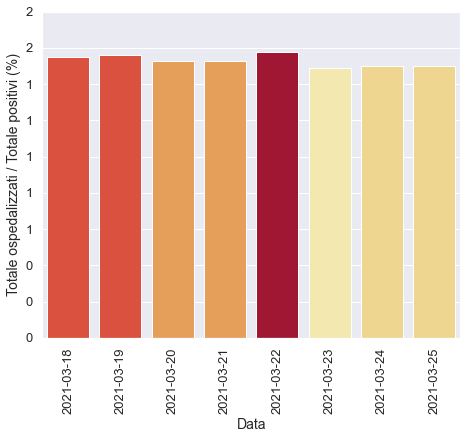

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

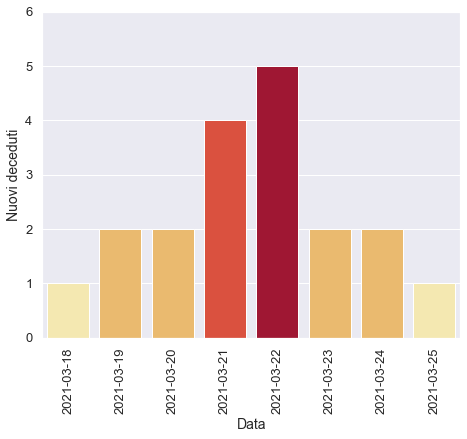

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

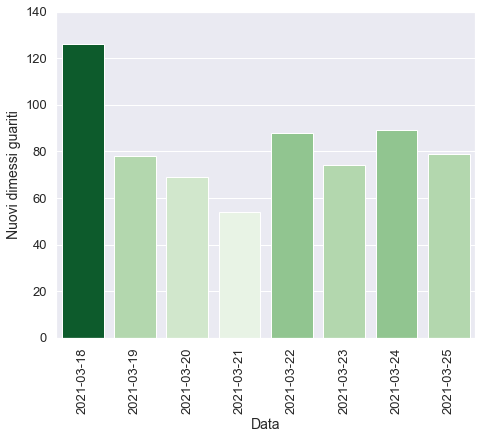

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)